# Lesson Outline
- History of DQN 
- Limitations of Tabular Q-learning
- The Intuition behind DQN
- Fundamental maths 
- Q Network and Target Network
- Experience replay 
- Fixed Q Target


<div style="text-align: center;">
  <img src="images/Basic_reinforcement_learning_cycle.png" alt="Reinfocement_learning cycle" title="Reinforcement learning" width="600" height="400" />
</div>

In [2]:
# Recall the bellman equation from the tabular Q-learning used to obtain the value for a given state

# Limitations of Tabular Q-learning

- As the environment gets more complex, it becomes infeasible to map every state
- Tabular Q-learning would require the agent to visit every state multiple times, which may not be practical or possible.


# Why Neural Networks

- Neural networks estimates values or polices for states the agent has not visited
- Fundamental assumtion is that states with similar observations have similar values

# Value Neural Network

<div style="text-align: center;">
  <img src="images/value_neural_network.png" alt="Reinfocement_learning cycle" title="Reinforcement learning" width="600" height="400" />
</div>

# Policy Neural Network

<div style="text-align: center;">
  <img src="images/policy_neural_network.png" alt="Reinfocement_learning cycle" title="Reinforcement learning" width="600" height="400" />
</div>

#  Two seperate Neural Networks
- Value Neural Network estimates the value at a given state
- Policy Neural Network estimates policy at a given state

In [ ]:
# some key questions:
# What is the relationship between agent feedback and the networks?
# How do we update the weights of these neural networks?
# How do we connect the value network with the policy network?

In [ ]:
# Key Insight : Is it possible to frame a reinforcement learning process as a supervised learning process for the neural network?

$$
V(s) = \max_a \left( R(s,a) + \gamma  V(s') \right)
$$

# Updating the value Neural Network

<div style="text-align: center;">
  <img src="images/updating_value_function.png" alt="Updating Value Function" title="Updating Value function" width="600" height="400" />
</div>

In [ ]:
# Assuming a negative reward for each point in the grid, gamma= 0.9 
# Using the bellman equation we can have the updated V as V(s) = -1 + 0.9x6 = 4.4

**Error Metric:**


$$
\left( V(s) - \max_a \left( R(s,a) + \gamma \times V(s') \right) \right)^2
$$


- Bellman Equation is used to create the label 
- The observations are uses as the features 
- More like a supervised learning problem

In [ ]:
# SO far we have a value network capable of estimating values given observations , but what about the policy 
# We still need to develop the policy neural network that will choose an action

# Updating Policy network

<div style="text-align: center;">
  <img src="images/updating_policy_network.png" alt="Updating Policy network " title="Updating policy network" width="600" height="400" />
</div>

- What we aim to achieve is increase the probability of taken the right action in the given state
- The higher that gain is we want to increase that probability of taking that action in a given state

<div style="text-align: center;">
  <img src="images/updating_gain_table.png" alt="Updating gain table " title="Updating gain table" width="600" height="400" />
</div>

In [10]:
# Assuming that the probabolity of moving right with the given observation is slow how do we update this to boast the probability
# Gradient increase 3 x In(0.2)

In [ ]:
# Key Ideas Remaining 
# Experience Replay

In [ ]:
# A key part of improving performance with DQN is the use of expereince replay
# Expereince replay was introduced by Long-Ji Lin in the paepr : "Self - improving Reactive Agents Based On Reinforcement learning ,Planning and Teaching" in 1992

# Replay Buffer 
- Recall when using neural networks for supervised learning tasks, we had all the historical data at once
- this means we could easily shuffle the data and split into a training set and test set
- Randomly shuffling data helped avoid overfitting and the model could more easily generalize

<div style="text-align: center;">
  <img src="images/DQN_learning_circle.png" alt="DQN learning circle " title="DQN learning circle" width="800" height="600" />
</div>

# Difference between the supervised and reinforcment learning problem
- Data obtained from the basic reinforcment learning process is gather "online". 
- Online mainly has to do with time series data 
- Optimisation methods for supervised learning algorithms (such as ANN) often assume data is Independently and Identically Distributed (IID)
- For example, in a data set of cat and dog images of different cats are independent of each other 
- for an ongoing process the experiences of the agent are non IID
- The replay buffer helps us to use optimization algorithms developed for IID data to non  - IID data
- Another difficulty with most reinforcement learning problems is that the target is changing (i.e the optimal action at a given state at a given time would be different 
- essentially we have non-stationary targets

# How do we solve the above challenges 
- Use an expereince replay buffer to sample agent feedback experience to mimic a dataset that is closer to IID
- Use a separate target neural network that is updated periodically

# Experience Replay Buffer 
- The buffer holds N steps of agent feedback from the environment (experience)
- As the complexity of the environment increases the higher the buffer size

<div style="text-align: center;">
  <img src="images/Experience_Replay_Buffer_Deque.png" alt="Expereince Replay " title="Experience" width="800" height="600" />
</div>

# Mini - Batch
- We use the minibatch to obtain random sample from the Replay Buffer
- The randmom sampling lower the variance as random samples would be less correlated
- This helps improve the robustness of the model

# Q- Network Model 
- Goal is to create a neural network that can directly output Q values.
- We also want to create a stable target to  train, rather than a target constantly changing

# Changing Network Structure 
- Instead of a policy network directly outputting an action, we would like a Q value instead with Q(s,a)
- This allows to apply the epsilon greedy action strategy

 <div style="text-align: center;">
  <img src="images/Q_network_training_process.png" alt="Q_network Update " title="Q Network" width="800" height="600" />
</div>

In [ ]:
Error = optimal Q(s,a) - Q (S,a)

- Obtaining the error we use the experience to get the optimal action at the future time step 
- However for this to happen with a single network we would have to update the weight twice once for the obtaining the Q value, and second for obtaining the optimal Q
- Major issues we would have to do a forward pass twice without backpropagation 
- Because each pass the weight changes the double pass changes q* 
- This leads to a very unstable training process, since your target Q is constantly changing with each pass
- often this issue is refereed to as chasing your own tail since Q is constantly changing Q *.

# How do we solve the changing target
- The use of target network
- The target network is devoted to the Target Q so is not constantly changing 
- We can think of the Q- network as the policy network and our Target Network as the value network
- We create two identical network
- but we only update the target network periodically

 <div style="text-align: center;">
  <img src="images/Target_Network_and_Q_network.png" alt="Q and Target network" title="Q targe" width="800" height="600" />
</div>

# Code Implementation 

# 1. Import dependencies 

In [1]:

import gymnasium as gym
import time
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from dqn_agent import Agent

# 2. Instantiate the environment

In [7]:

env = gym.make("CartPole-v1",render_mode='human')

print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)
agent = Agent(state_size=4, action_size=2, seed=0)

State shape:  (4,)
Number of actions:  2


# 3. Visualizing un trained agent 

In [8]:

from dqn_agent import Agent

agent = Agent(state_size=4, action_size=2, seed=0)

# watch an untrained agent
state,info = env.reset()
for j in range(30):
    action = agent.act(state)
    env.render()
    time.sleep(0.5)
    state, reward,terminated,truncated,info= env.step(action)
    if terminated or truncated:
        break 
        
env.close()

# 4. Train the Agent with DQN

In [9]:
env = gym.make("CartPole-v1")

Episode 100	Average Score: 17.89
Episode 200	Average Score: 12.45
Episode 300	Average Score: 11.06
Episode 400	Average Score: 10.51
Episode 500	Average Score: 10.68
Episode 600	Average Score: 14.75
Episode 700	Average Score: 17.05
Episode 800	Average Score: 21.02
Episode 900	Average Score: 22.42
Episode 1000	Average Score: 159.43
Episode 1032	Average Score: 200.01
Environment solved in 932 episodes!	Average Score: 200.01


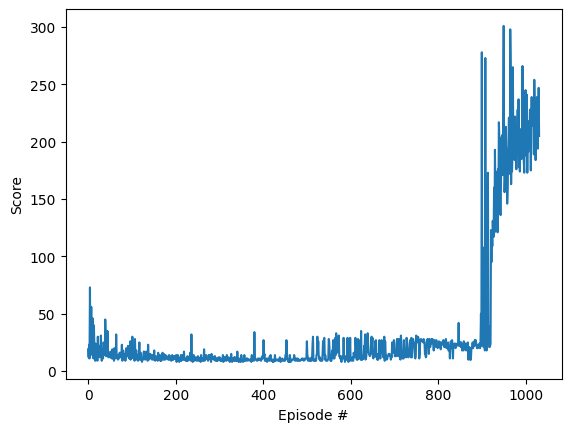

In [10]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state,info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, info,_ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_car_pole.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# 5. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [11]:
env = gym.make("CartPole-v1",render_mode='human')
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_car_pole.pth'))

for i in range(3):
    state,done = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, _ ,info_2= env.step(action)
        if done:
            break 
            
env.close()